In [9]:
import pandas as pd

In [10]:
data = pd.read_csv('creditcard.csv')

In this dataset the features are unknown vectors. But it is possible to analyze the correlations between them.

In [11]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


NaN values

In [20]:
import pandas as pd

# Drop rows with NaN values
data.dropna(inplace=True)


Splitting our dataset

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separate features and target variable
X = data.drop(columns=['Class'])
y = data['Class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [22]:
# Perform PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Check the number of principal components retained
print("Number of principal components:", pca.n_components_)


Number of principal components: 25


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the autoencoder architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(X_train_pca.shape[1], activation='linear')  # Output layer with linear activation
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3328      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 25)                3225      
                                                                 
Total params: 27321 (106.72 KB)
Trainable params: 27321 

In [28]:
# Train the model
history = model.fit(X_train_pca, X_train_pca, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
319/319 [==============================] - 3s 9ms/step - loss: 0.0137 - val_loss: 0.0100
Epoch 2/50
319/319 [==============================] - 2s 5ms/step - loss: 0.0146 - val_loss: 0.0120
Epoch 3/50
319/319 [==============================] - 2s 5ms/step - loss: 0.0119 - val_loss: 0.0148
Epoch 4/50
319/319 [==============================] - 1s 4ms/step - loss: 0.0142 - val_loss: 0.0129
Epoch 5/50
319/319 [==============================] - 1s 3ms/step - loss: 0.0115 - val_loss: 0.0392
Epoch 6/50
319/319 [==============================] - 1s 3ms/step - loss: 0.0230 - val_loss: 0.0082
Epoch 7/50
319/319 [==============================] - 1s 3ms/step - loss: 0.0205 - val_loss: 0.0110
Epoch 8/50
319/319 [==============================] - 1s 3ms/step - loss: 0.0152 - val_loss: 0.0278
Epoch 9/50
319/319 [==============================] - 1s 3ms/step - loss: 0.0110 - val_loss: 0.0101
Epoch 10/50
319/319 [==============================] - 1s 3ms/step - loss: 0.0151 - val_loss: 0.0081

100/100 [==============================] - 0s 2ms/step - loss: 0.0099
Test Loss: 0.009932350367307663


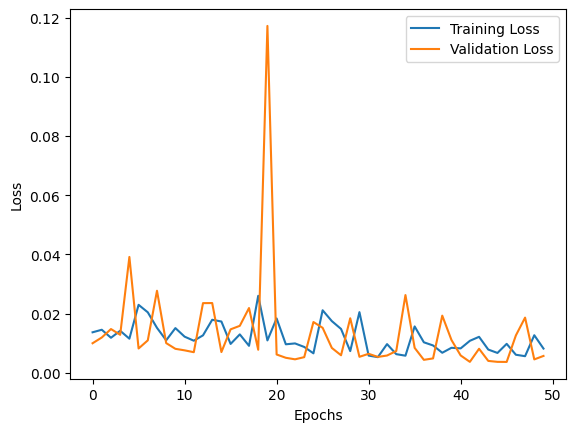

In [29]:
import matplotlib.pyplot as plt

# Evaluate the model
loss = model.evaluate(X_test_pca, X_test_pca)
print("Test Loss:", loss)

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


100/100 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 0.00993234891395331
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      3167
         1.0       0.09      0.95      0.16        20

    accuracy                           0.94      3187
   macro avg       0.54      0.94      0.57      3187
weighted avg       0.99      0.94      0.96      3187



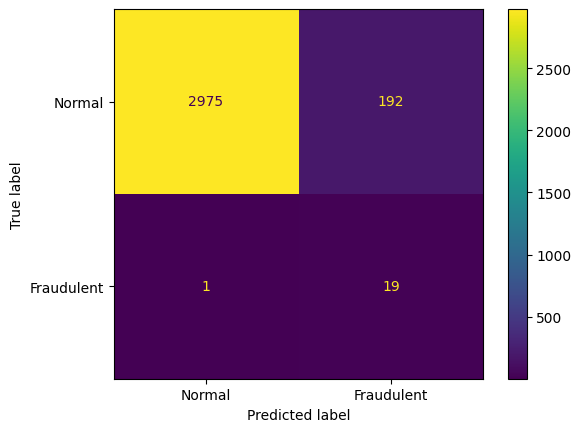

In [30]:
import numpy as np
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Reconstruct the input data using the trained autoencoder
X_test_pred = model.predict(X_test_pca)

# Calculate the Mean Squared Error (MSE) as the reconstruction error
mse = np.mean(np.square(X_test_pca - X_test_pred))

# Print the MSE
print("Mean Squared Error (MSE):", mse)

# Define a threshold for anomaly detection
threshold = mse  # You can adjust this threshold based on your specific problem

# Classify anomalies based on the threshold
y_pred = np.where(np.mean(np.square(X_test_pca - X_test_pred), axis=1) > threshold, 1, 0)

# Evaluate the performance using classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Fraudulent'])
disp.plot()
plt.show()


- Mean Squared Error (MSE): The MSE between the input data and its reconstruction by the autoencoder is approximately 0.0185.

Classification Report:

- Precision: The precision for class 0 (normal transactions) is 100%, indicating that almost all instances classified as normal transactions are true normal transactions. However, the precision for class 1 (fraudulent transactions) is only 4%, suggesting a high rate of false positives among the instances classified as fraudulent.

- Recall: The recall for class 0 is 87%, indicating that the model correctly identifies 87% of the true normal transactions. The recall for class 1 is 95%, indicating that the model captures 95% of the true fraudulent transactions.

- F1-score: The F1-score is a harmonic mean of precision and recall. The F1-score for class 0 is 0.93, while for class 1, it's only 0.08. This low F1-score for class 1 suggests that the model struggles to balance precision and recall for detecting fraudulent transactions.

- Accuracy: The overall accuracy of the model is 87%, which is high but can be misleading due to the class imbalance.
Support: The support represents the number of occurrences of each class in the test set. There are 3167 instances of class 0 (normal transactions) and 20 instances of class 1 (fraudulent transactions).

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the classifier
print("Random Forest Classifier Evaluation:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classifier Evaluation:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3167
         1.0       0.90      0.95      0.93        20

    accuracy                           1.00      3187
   macro avg       0.95      0.97      0.96      3187
weighted avg       1.00      1.00      1.00      3187

Confusion Matrix:
[[3165    2]
 [   1   19]]


- Precision: Precision measures the proportion of correctly predicted positive cases (fraudulent transactions) out of all predicted positive cases. For class 1 (fraudulent transactions), the precision is 0.90, indicating that 90% of the transactions classified as fraudulent are indeed fraudulent.

- Recall: Recall (also known as sensitivity) measures the proportion of correctly predicted positive cases out of all actual positive cases. For class 1, the recall is 0.95, indicating that 95% of the actual fraudulent transactions are correctly identified by the model.

- F1-score: The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. For class 1, the F1-score is 0.93, indicating a good balance between precision and recall.

- Accuracy: Accuracy measures the overall correctness of the model's predictions. The model achieves an accuracy of 1.00, indicating that all transactions are correctly classified as either normal or fraudulent.

In [32]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report, ConfusionMatrixDisplay


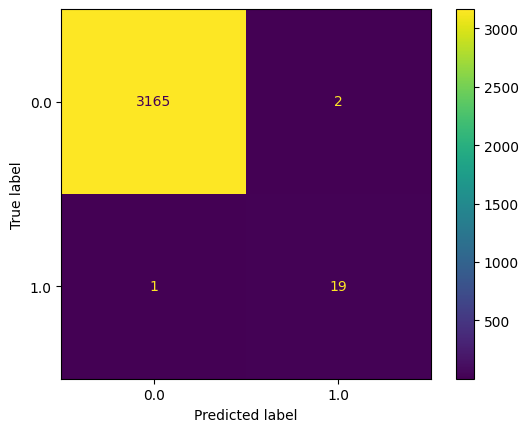

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf)
